In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [29]:
print('{}'.format(iris_dataset.keys()))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [30]:
print(*iris_dataset['feature_names'])
iris_dataset['data'][:3]

sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [31]:
print('{}'.format(iris_dataset['data'].shape))

(150, 4)


In [32]:
print('{}'.format(iris_dataset['target'].shape))

(150,)


In [33]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'],
                                                    random_state = 3)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [41]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

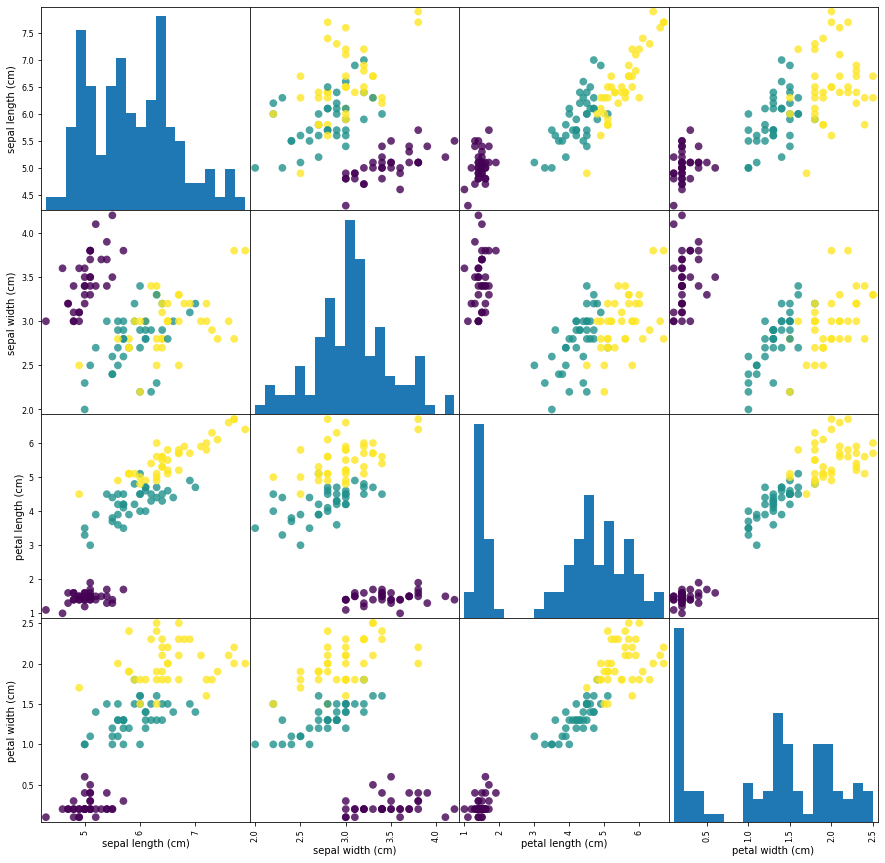

In [42]:
plot = pd.plotting.scatter_matrix(iris_dataframe, 
                                  c = y_train, 
                                  figsize = (15, 15),
                                  marker = '0',
                                  hist_kwds = {'bins': 20},
                                  s = 60,
                                  alpha = .8)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
# help(KNeighborsClassifier)

In [49]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [72]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new

array([[5. , 2.9, 1. , 0.2]])

In [73]:
prediction = knn.predict(X_new)
print('Прогноз: {}'.format(prediction))
print('Метка: {}'.format(iris_dataset['target_names'][prediction]))

Прогноз: [0]
Метка: ['setosa']


In [76]:
prediction = knn.predict(X_test)
print('Прогнозы: \n{}'.format(prediction))
print('Ответы: \n{}'.format(y_test))

Прогнозы: 
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 1
 0]
Ответы: 
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 1
 0]


In [66]:
print('Точность: {:.2f}'.format(knn.score(X_test, y_test)))

Точность: 0.95


### F-Score обычно используется для бинарных классификаторов (является - не является)

In [78]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, prediction, average = 'macro')

(0.9419191919191919, 0.9419191919191919, 0.9419191919191919, None)